# SI 618 - Homework 04: Visualization, Correlation, and Linear Models

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [63]:
MY_UNIQNAME = 'elenore'

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

## Download the data from: 

* [https://www.kaggle.com/datasnaek/youtube-new](https://www.kaggle.com/datasnaek/youtube-new)

> YouTube provides a list of trending videos on it's site, determined by user interaction metrics such as likes, comments, and views. This dataset includes months of daily trending video across five different regions: the United States ("US"), Canada ("CA"), Great Britain ("GB"), Germany ("DE"), and France ("FR").

* https://www.kaggle.com/abcsds/pokemon

> This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

## Part 1: Answer the questions below based on the *[YouTube dataset](https://www.kaggle.com/datasnaek/youtube-new)*
- Write Python code that can answer the following questions, and
- <b>Explain your answers in plain English. </b>

### <span style="color:magenta">  Q1. For 15 Points: Compare the distributions of comments, views, likes, and dislikes</span>

* Plot histograms for these metrics *for the US*. What can you say about them?
* Try to apply a log transformation, and plot the histograms again. How do they look now?
* Create a pairplot *for the US*, as we did in this week's lab. Do you see anything interesting?
* Create additional pairplots for the other four regions. Do they look similar?

In [65]:
youtube = pd.read_csv('youtube-new/USvideos.csv')

In [66]:
youtube.head()
youtube.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


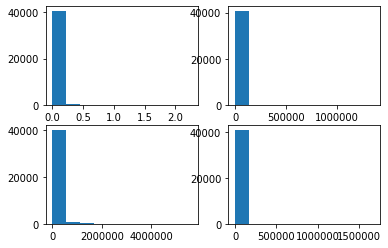

In [67]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.hist(youtube['views'])
ax2.hist(youtube['comment_count'])
ax3.hist(youtube['likes'])
ax4.hist(youtube['dislikes'])
plt.show()

# Q1.1: 
The histograms for these metrics for the US are terrible. The values are too big (5-digits or 6-digits or even more) and all accumulated in one bin, audience can barely see any trends or distribution from plots.

In [68]:
youtube['views_log'] = np.log(youtube['views'])
youtube['comments_log'] = np.log(youtube['comment_count']+1)
youtube['likes_log'] = np.log(youtube['likes']+1)
youtube['dislikes_log'] = np.log(youtube['dislikes']+1)

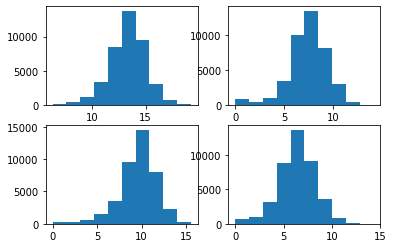

In [69]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.hist(youtube['views_log'])
ax2.hist(youtube['comments_log'])
ax3.hist(youtube['likes_log'])
ax4.hist(youtube['dislikes_log'])
plt.show()

# Q1.2:
Since there are too many 0 values in comment_count, likes and dislikes columns, I used np.log(value+1) to finish the log transformation.

The log histograms look much better. It now can show the distributions. Firstly, all of the distributions are relatively normal. Views column generally have way bigger values than that of other metrics, with a mean value at nearly 15-digits integer. This makes sense since it's the first action of user, and the other 3 metrics needs user's further actions, so I can almost confidently say, the views count of a youtube video is always bigger than that of comments, likes and dislikes. Most comment count falls in the range of 6-digits number to 11-digits number with a mean value at 7-digits number. Similarly, dislikes distribution shares the nearly same range, with slightly smaller mean value. Likes of youtube video are mostly between 10-digits numbers to 12-digits numbers, with a larger mean value than that of dislikes. It can be assumed most videos have more likes than dislikes. 

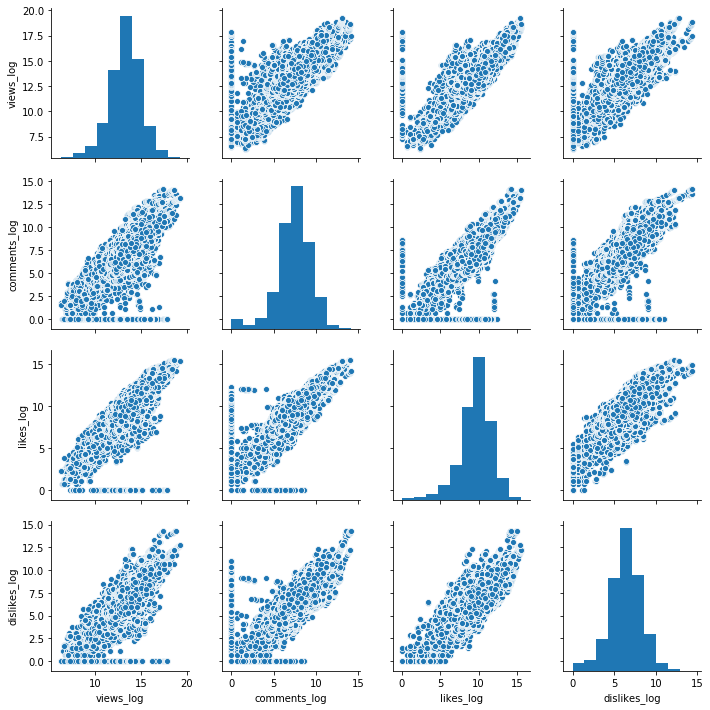

In [70]:
sns.pairplot(youtube, vars=['views_log','comments_log','likes_log','dislikes_log'])

# Q1.3:
I analysed the histograms in Q2, so I will focus on the scatter plots for this question. 

In general, the four metrics, views, comments, likes and dislikes have positive correlations. This makes sense. When the views increases, the video will have increasing chances to be commented, liked or disliked. Some interesting findings are that the positive correlations are not always true in a few cases. For example, with the views growing, sometimes the comments, likes and dislikes will remain 0. I'm not a youtube expert, but I assume there might be functions that video uploader can set user permission, that only allows user to view, but not comment, like or dislike. These kind of rare cases happening between almost every 2 metrics except between likes and dislikes. It seems pretty straightforward that dislikes will always increase with likes, or vice versa (just based on the log transformed plots observation). 

In [71]:
def create_plots_for_other_4_regions(dataset):
    dataset['views_log'] = np.log(dataset['views'])
    dataset['comments_log'] = np.log(dataset['comment_count']+1)
    dataset['likes_log'] = np.log(dataset['likes']+1)
    dataset['dislikes_log'] = np.log(dataset['dislikes']+1)
    sns.pairplot(dataset, vars=['views_log','comments_log','likes_log','dislikes_log'])

In [72]:
youtube_ca = pd.read_csv('youtube-new/CAvideos.csv')
youtube_de = pd.read_csv('youtube-new/DEvideos.csv')
youtube_fr = pd.read_csv('youtube-new/FRvideos.csv')
youtube_gb = pd.read_csv('youtube-new/GBvideos.csv')

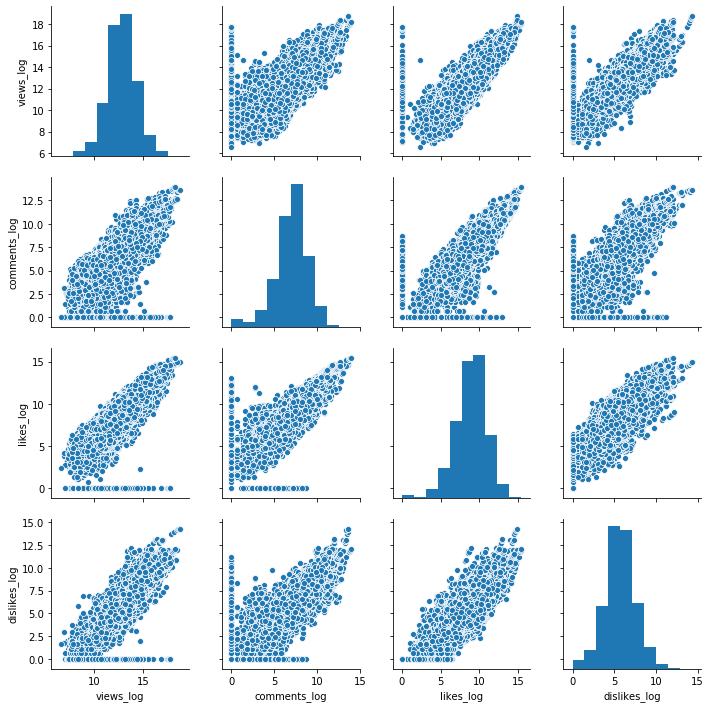

In [73]:
create_plots_for_other_4_regions(youtube_ca)

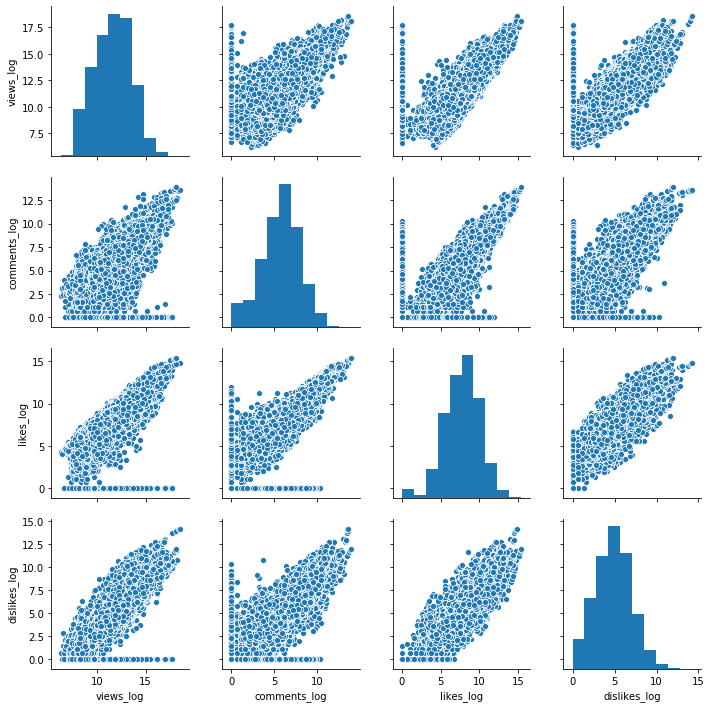

In [74]:
create_plots_for_other_4_regions(youtube_de)

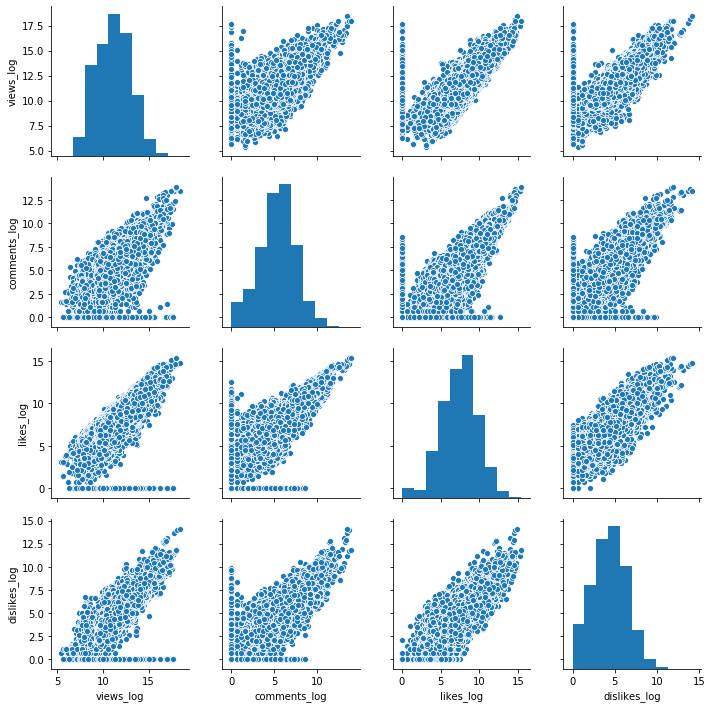

In [75]:
create_plots_for_other_4_regions(youtube_fr)

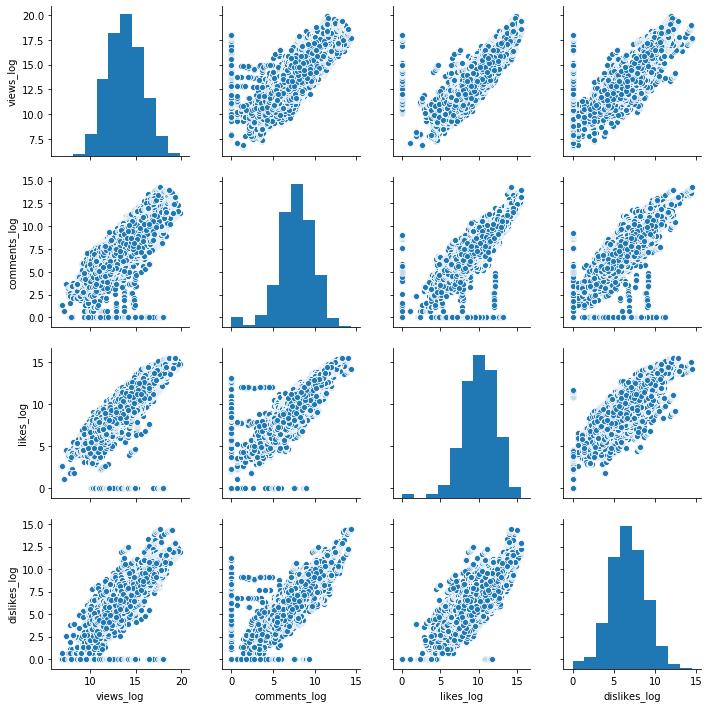

In [76]:
create_plots_for_other_4_regions(youtube_gb)

# Q1.4:
So I plotted the youtube datasets of Canada, Germany, France and Britain. I actually tried all the datasets, and the distributions and correlations all look very much similar among different countries. There are not many interesting findings for this question, I guess the in terms of the relationships among views, comments, likes and dislikes, the user behaivior worldwide are quite similar. 

### (Use this space to explain your answers)
I didn‘t use this space to explain my answers since they are too many and it will be more clear to write them below corresponding charts instead of writing them all together in one chunk. I marked the question number before my answer so hopefully less confusing for you. Please refer above and don't deduct scores because of this.

### <span style="color:magenta"> Q2. For 10 Points: Create a heatmap of correlations between the variables for a region of your choice </span>

>A [heat map (or heatmap)](https://en.wikipedia.org/wiki/Heat_map) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Seaborn makes it easy to create a heatmap with [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.
* Are there any interesting correlations? What are they?

In [77]:
youtube_de = pd.read_csv('youtube-new/DEvideos.csv')

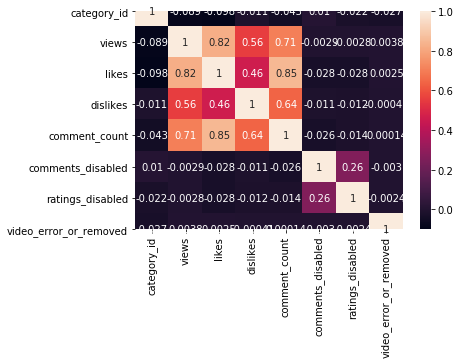

In [78]:
correlation = youtube_de.corr()
sns.heatmap(correlation, annot=True)

I chose Germany's youtube dataset to analyse. The heatmap seems a perfect chioce for exploring correlations between variables. The darker color is, the less correlations two variables have. Therefore we can quickly focus on the ligher-color sections. 'likes' and 'comments' have the strongest correlation with 0.85, meaning 'comments' mostly likely to increase with 'likes' increasing. Following by 'likes' and 'views' with correlation 0.82, and 'views' and 'comments' with correlation 0.71. The 'comments' is likely to increase with 'dislikes' increases, and I think that's because although people dislike the video, they still have the urge to leave critiques before disappointly close the video. The correlation between 'likes' and 'dislikes' is lowest among the metrics. These findings fit the observation in Q1.

### <span style="color:magenta"> Q3. For 15 points: Create and compare OLS models using variables of your choice, for a region of your choice </span>
* Use statsmodels to perform an ANOVA (categorical regression) of a variable of your choice as the dependent variable (for example, views) and the video category as the independent variable. 
* Provide your interpretation of the results. 
* Create two different regression models where the dependent variables are the same, and the independent variables are different. What does your interpretation say about the two models?

In [79]:
youtube_de.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...


In [80]:
model1 = smf.ols('views ~ C(category_id)', data=youtube_de).fit()
model1.summary()
aov_table = sm.stats.anova_lm(model1, typ=2)
print(aov_table)

                      sum_sq       df          F  PR(>F)
C(category_id)  8.935793e+15     17.0  99.157176     0.0
Residual        2.163985e+17  40822.0        NaN     NaN


According to the probability of F-statistic, 0, which is smaller than 0.05, I can say there's significant difference in the means of 'views' among different categories, that means there will be at least 1 group has different average value with other groups. 

In [81]:
youtube_de['views_log'] = np.log(youtube_de['views'])
youtube_de['comments_log'] = np.log(youtube_de['comment_count']+1)
youtube_de['likes_log'] = np.log(youtube_de['likes']+1)
youtube_de['dislikes_log'] = np.log(youtube_de['dislikes']+1)

In [82]:
model2 = smf.ols('views_log ~ likes_log', data=youtube_de).fit()
model3 = smf.ols('views_log ~ comments_log', data=youtube_de).fit()

In [83]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              views_log   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                 6.692e+04
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:22:36   Log-Likelihood:                -64511.
No. Observations:               40840   AIC:                         1.290e+05
Df Residuals:                   40838   BIC:                         1.290e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6059      0.020    326.903      0.000       6.566       6.645
likes_log      0.6440      0.002    258.696      0.000       0.639       0.649
==============================================================================
Omnibus:                     9543.620   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49868.912
Skew:                           1.032   Prob(JB):                         0.00
Kurtosis:                       8.005   Cond. No.                         28.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              views_log   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                 4.946e+04
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:22:36   Log-Likelihood:                -68123.
No. Observations:               40840   AIC:                         1.362e+05
Df Residuals:                   40838   BIC:                         1.363e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.0045      0.017    459.435      0.000       7.970       8.039
comments_log     0.6269      0.003    222.386      0.000       0.621       0.632
==============================================================================
Omnibus:                     5646.661   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18179.414
Skew:                           0.712   Prob(JB):                         0.00
Kurtosis:                       5.942   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I used OLS regression for both models since all variables I chose are numeric, and since the original data for these variables are too large, I log transformed them.

For 'views' and 'likes', the R-squared is 0.621, meaning 62.1% variation in 'views' that is explained by 'likes', while only 54.8% in which can be explained by 'comments'. 
The Prob (F-statistic) for both model is 0, meaning there is significant difference for the 2 variables in both models. 

## Part 2: Answer the questions below based on the *[Pokémon dataset](https://www.kaggle.com/abcsds/pokemon)* </span>
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

### <span style="color:magenta"> Q4. For 10 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.). </span>

* Which pairs have the most/least correlation coefficients?

In [85]:
pokemon = pd.read_csv('Pokemon.csv')

In [86]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


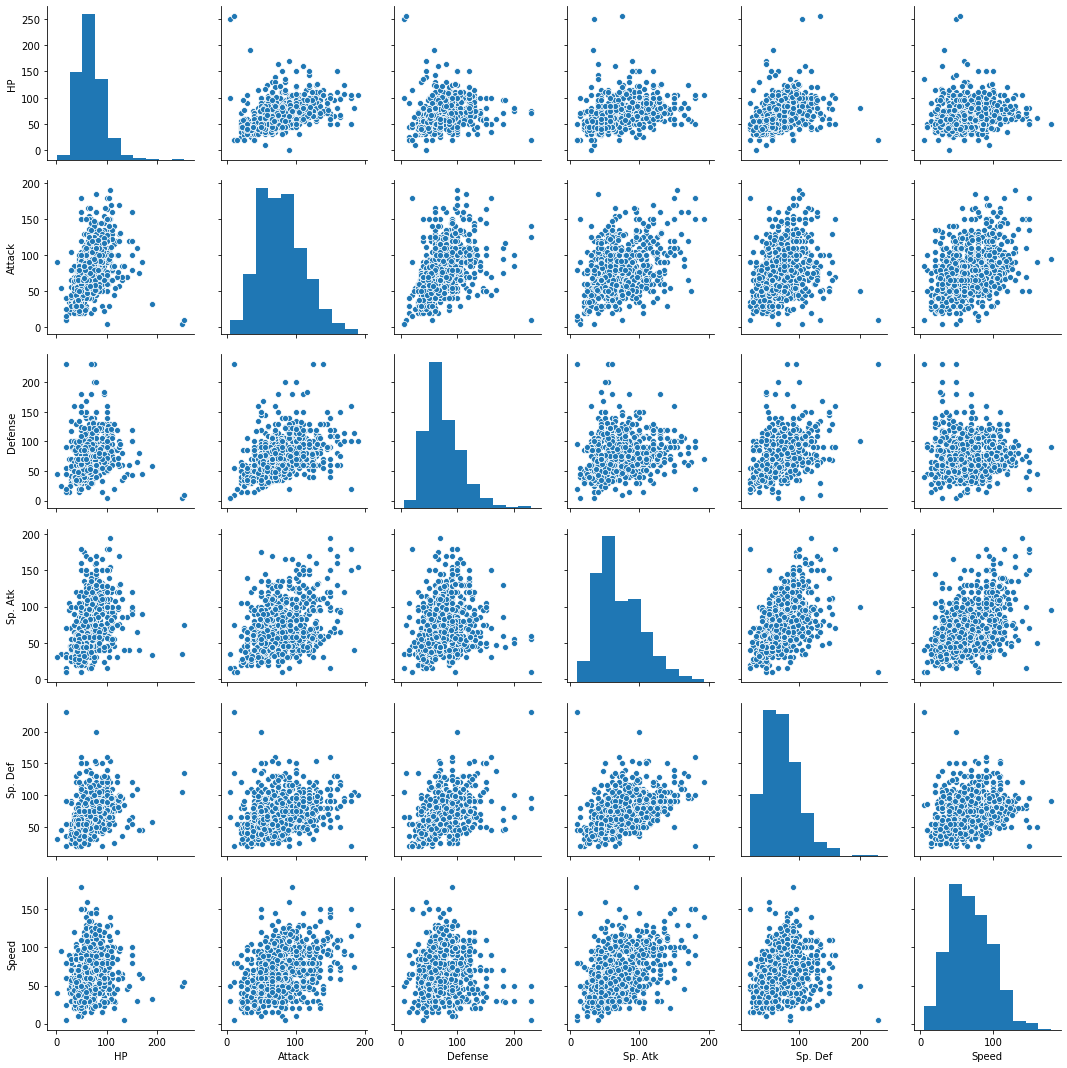

In [87]:
sns.pairplot(pokemon, vars=['HP', 'Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed' ])

From the plots, it's pretty obvious HP has most correlations with all other abilities, which are all postive. Then I did some research about HP:

When you use your Pokémon in a battle against other players — say, when you're attacking or defending a gym — any damage done to your Pokémon subtracts from the Pokémon's total number of Hit Points. So HP is kind of like a measure of your Pokémon's stamina and health.
source: https://www.bustle.com/articles/174352-what-does-hp-mean-in-pokemon-go-this-stat-is-crucial-for-your-battle-strategies

So this makes sense. The healthier pokemon is, the stronger its ability is, no matter in terms of attack or defense etc. 

All other variables seems don't have strong correlation with each other. The points in scatterplots are very scattered. To confirm, I got all the correlations in pokemon dataset:

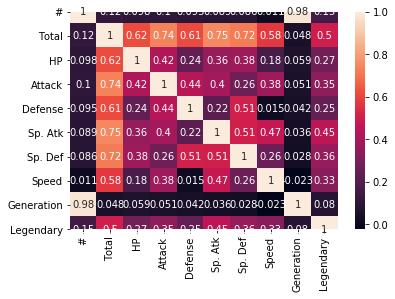

In [88]:
correlation = pokemon.corr()
sns.heatmap(correlation, annot=True)

From the heatmap, it can be seen most abilities have positive correlations with each other. But the most correlations are between 'Sp.Atk' and 'Sp.Def'. I did some more research about these two variables:

Attack/Defense:
Normal,Fighting,Bug,Rock,Ground,Flying,Steel,Poison,Ghost

Special Attack/Special Defense:
Psychic,Fire,Electric,Water,Ice,Dark,Dragon,Grass

source: https://www.gamespot.com/forums/nintendo-fan-club-1000001/in-pokemon-whats-special-attack-and-special-defens-25684073/

Then I'll assume these two special skills can facilitate each other. Also, although in general the abilities have positive and ralatively strong relationships, 'Defense' and 'Speed' has a kind of weak connection, meaning the 'Defense' ability is less likely influenced by 'Speed', or vice versa. 

For some other non-ability variables, there are some interesting correlations as well. For example, all the ability variables has positive correlations with 'total', which is obvious since they will be added to the total ability, but HP plays the biggest role compared with other abilities. 

I was assuming before that the higher generation a pokemon is, the hither abilities it has. But from the heatmap, it seems there's almost no relationship between them. 



### <span style="color:magenta"> Q5. For 15 Points: Plot the distribution of ability points per Pokémon type </span>

* How would you describe each Pokémon type with different ability points?

In [89]:
def get_histgram(type1):
    filtered = pokemon[pokemon['Type 1']==type1]
    f, ((ax1, ax2, ax3),(ax4, ax5,ax6)) = plt.subplots(2,3)
    ax1.hist(filtered['HP'])
    ax1.set_ylabel(type1)
    ax2.hist(filtered['Attack'])
    ax3.hist(filtered['Defense'])
    ax4.hist(filtered['Sp. Atk'])
    ax5.hist(filtered['Sp. Def'])
    ax6.hist(filtered['Speed'])
    plt.show()

In [90]:
# get_histgram('Flying')

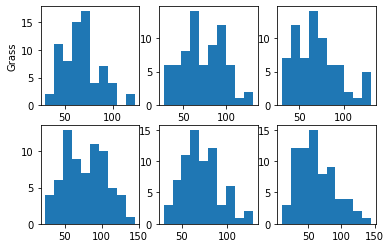

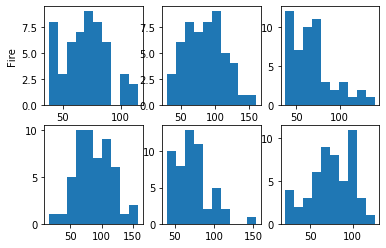

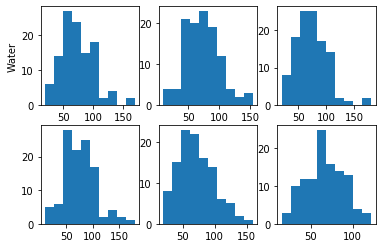

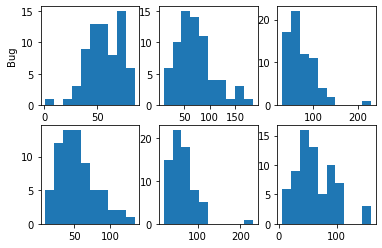

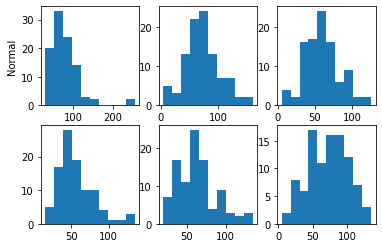

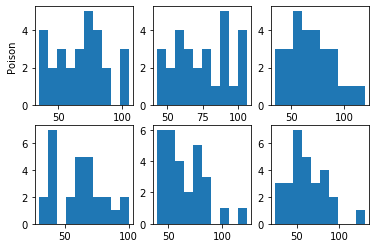

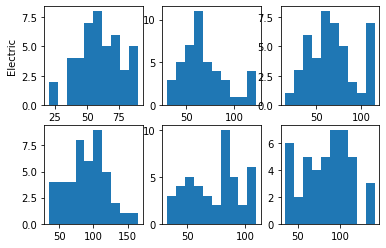

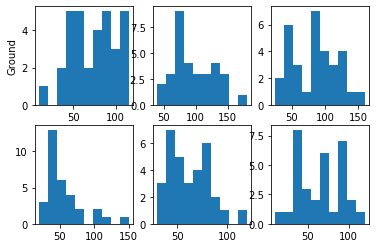

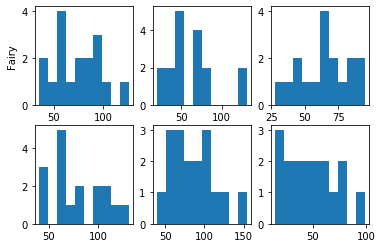

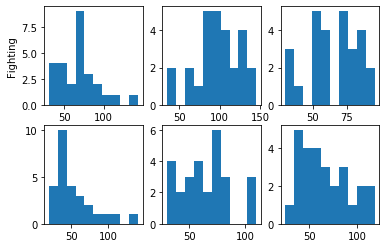

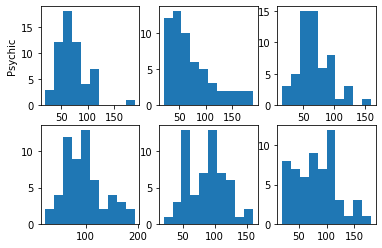

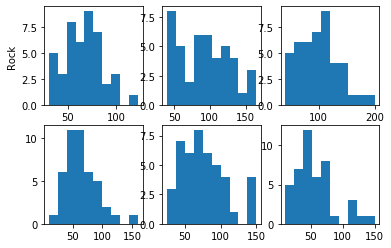

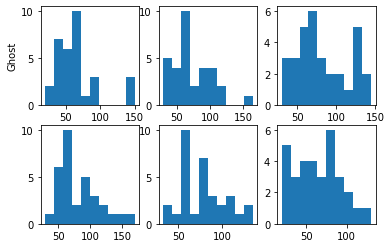

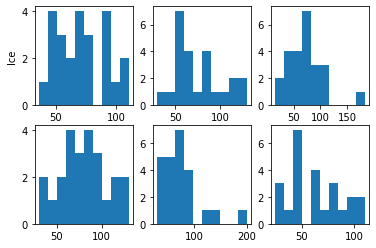

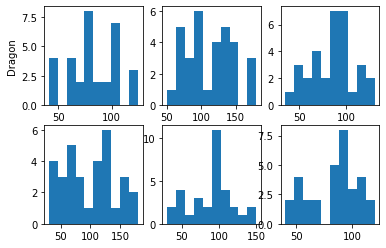

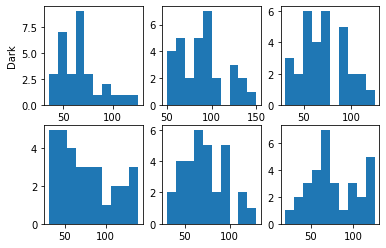

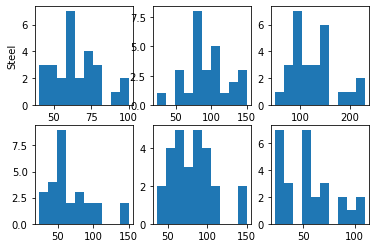

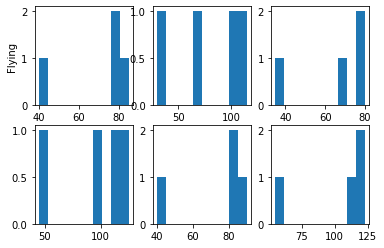

In [91]:
for types in pokemon['Type 1'].unique():
    get_histgram(types)

In [92]:
pokemon['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

There are two columns in pokemon dataset indicating pokemon's type, I choose 'Type 1' to conduct my analysis. There are 18 types of pokemon: 'Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'.
       
In general, it's very hard to conclude the distributions for each type, many cases have very weird distribution patterns, or has a combining features of different patterns. Many distributions have empty bins, which make it harder to discribe.

For type Grass, pokemon's HP has a right skewed relatively(not very) normal distribution. Attack and SP.Atk have bimodal distributions, Defense has a right skewed bimodal distribution. SP.Def and Speed have a relatively right skewed normal distributions. 

For type Fire, HP almost has a uniform distribution with some outliers at right side. Attack's distribution is somewhere between normal and uniform. SP.Atk has a right skewed bimodal distribution. Defense and Speed's distribution is very much like bimodal but not entirely. Sp. Def has a distribution I'm not sure how to describe. The first half looks like bimodal or uniform, the second half is like Power distribution, with empty bins during the range.

For type Water, HP has a right skewed almost normal distribution. Attack and SP.Atk has Poission distributions. Defense has a distribution between poission and bimodal. SP.Def has a right skewed normal distribution. Speed has an almost uniform distribution with a really tall bin at mean value.

For type Bug, HP has a left skewed bimodal distribution. Attack has a right skewed relatively normal distribution. Sp.Atk has a distribution close to poission with a few outliers bigger than 200, and similar pattern can be seen for Sp.Def distribution. Defense distribution is normally right-skewed, and Speed has a bimodal distribution with 2 empty bins at right side.

For type Normal, HP has a poission distribution with a few outliers bigger than 200. Attack and Sp.Atk has relatively normal distribution, so does Defense, which is right skewed a bit. Sp.Def has a distribution like bimodal, but really right skewed with a small peak near bin 100. Lastly, Speed's distribution is something between bimodal and normal distribution. I would say it's more like a normal distribution with some werid tall bins at left side.

For type Poison, all distributions are weird. HP, Attack, Defense, Sp.Def and Speed all have un-describable distributions. They all look like a mix of Power, uniform and bimodal. Sp.Atk could almost be a poission distribution.

For type Electric, HP and Defense has a combination of uniform and bimodal distribution. Attack's distribution is almost normal with many big outliers. Sp.Atk has a bimodal distribution also with many big outliers. Speed has an almost uniform distribution, and I'm speechless about Sp.Def's distribution.

For type Ground, HP and Attack has almost uniform distribution. Sp.Atk and Sp.Def have bimodal distributions. Defense has a poission distribution with some little bins at right side. Speed is like mutiple bimodal, maybe I can name it as trimodals?

For type Fairy, I would say all the distributions are the combinations of uniform and power, especiall Speed. Some of them are more uniform yet others are more power. Sp.Def has a bimodal rather than uniform.  


For type Fighting, this is another very weird distribution set. HP has a uniform with a really peak bin in the middle. Speed looks like a half normal distribution, or maybe a poission. Defense can be close to a right skewed poission (not very close). Attack can be a poission + bimodal + uniform, same as Sp.Def. Sp.Atk's distribution has 3 sections: first section looks like a right half of normal distribution, second section looks like a uniform, and the third section looks like a bimodal. 

For type Psychic, HP and Sp.Atk have poission distributions. Attack has a very right skewed poission. The rest 3 look more like bimodal, although Speed looks like bimodal + uniform. 

For type Rock, HP and Attack has bimodal. Sp.Atk and Sp.Def look like uniform distributions. Defense looks like a poission, but also kind of like right-skewed normal distribution. Speed has a bimodal.

For type Ghost, HP, Attack, Defense and Sp.Def have bimodal distributions, while Sp.Atk and Speed have more like uniform distributions. 

For type Ice, HP, Attack and Defense have bimodal distributions. Sp.Atk and Sp.Def have unform distributions with some outliers at right side. I don't know how to describe Speed, there's no pattern for this distribution.

For type Dragon, all distributions are like poission + bimodal. 

For type Dark, HP, Attack and Sp.Atk have bimodal distribution. Defense and Sp.Def have more like uniform distribution. Speed has a normal distribution at left side and bimodal distribution at right side.

For type Steel, HP, Sp.Atk and Defense have weird uniform distributions. Sp.Def has a bimodal. Attack and Speed don't have a distribution pattern, they are too random.

For type Flying, I'm speechless again. For all ability points, it seems all samples are distributed in 3 bins. I'm thinking maybe the ability for Flying type pokemon is more categorical variable rather than continuous numeric variables, or all the Flying pokemon have very narrowed ability difference ranges. 



### <span style="color:magenta"> Q6. For 15 Points: Explore how the Pokémon in each generation differ from each other? </span>

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?

In [93]:
# def get_pairplot(generation):
#     filtered = pokemon[pokemon['Generation']==generation]
#     sns.pairplot(filtered, vars=['HP', 'Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed' ])

In [94]:
# get_pairplot(1)

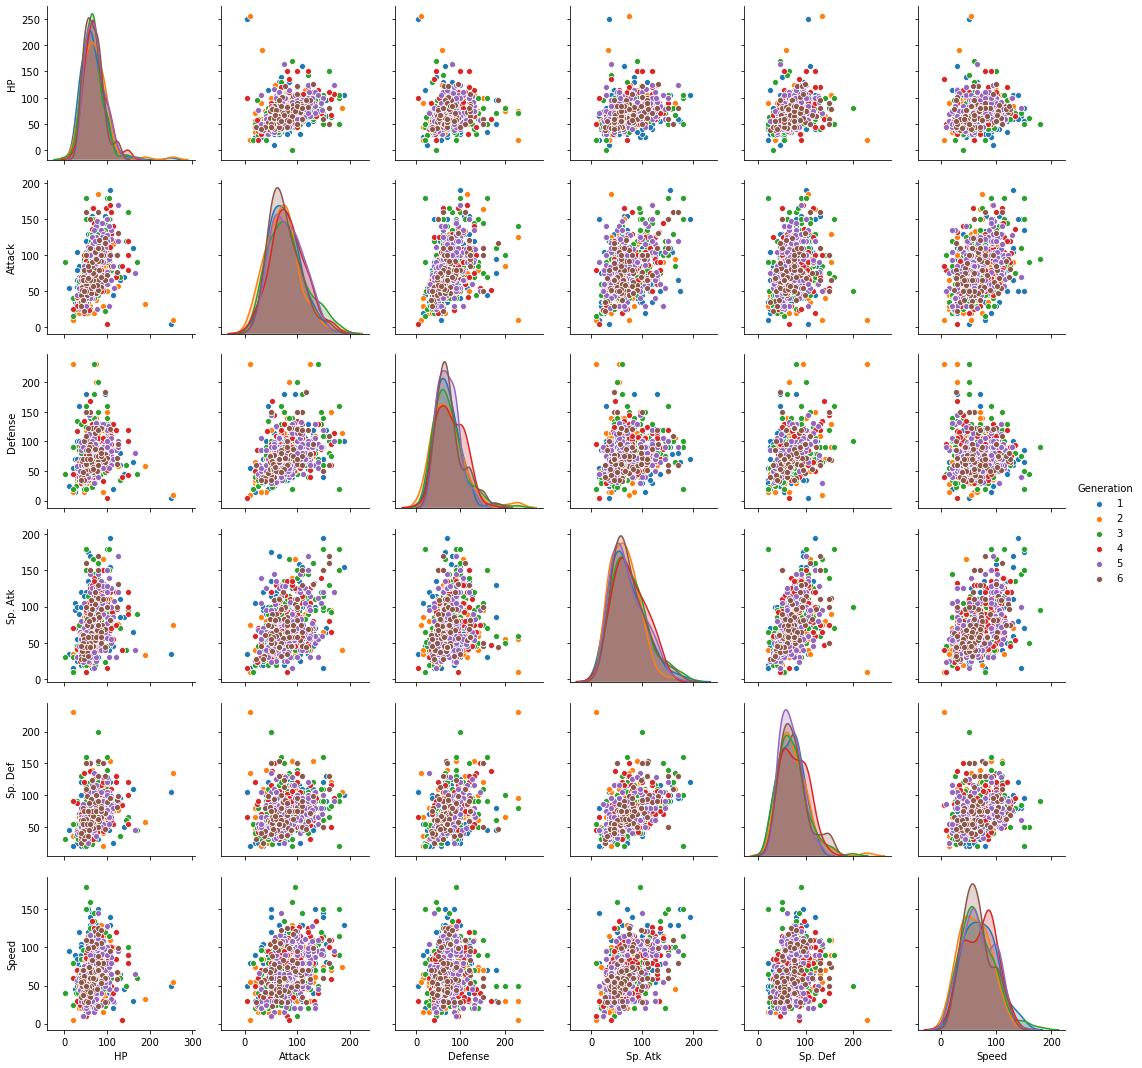

In [95]:
sns.pairplot(pokemon, vars=['HP', 'Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], hue='Generation' )

I can visualize each generation one by one, but I think put them in the same chart can have more direct comparison. I know 6 colors can be a bit messy, but it's the best way I came up with. From the histograms, Pokemons of different generations have very similar normal distribution and mean values in every ability point overall, especially for HP, Attack and Sp.Atk. In terms of Defense and Sp.Def, Generation 4 has a wider kurtosis, and generation 5 and generation 6 has more samples falling in the mean bin. Lastly, Speed in different generations seems have the most different distributions. Generation 1 has a normal distribution with a very wide kurtosis; generation 2 has a very normal distribution with the smallest mean value among all groups; generation 3 has the most normal distribution; generation 4 and generation 5 has bimodal distributions but in opposite direction; generation 6 has a very normal distribution and most value falling in the mean bin again. 

As for the scatter plots, I'd say they mostly overlap with each other besides the rare outliers. In general, It can be seen that HP has more correlations with all other abilities, while there's no obvious correlations between any other 2 abilities. Generation 6 seems always have more clustered points than previous generations, which means it has more correlations between 2 variables. 